# DIWALI SALES ANALYSIS PROJECT

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [5]:
df=pd.read_csv('Diwali Sales Data.csv',encoding='unicode_escape')

In [126]:
df.shape

(11251, 15)

In [117]:
df.head()


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [17]:
df.drop(['Status','unnamed1'],axis=1,inplace=True) #To delete blank columns

In [25]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [27]:
df.shape

(11251, 13)

In [29]:
df.dropna(inplace=True)

In [31]:
df.shape

(11239, 13)

In [33]:
#Changing the data type
df['Amount']=df['Amount'].astype('int')

In [35]:
df['Amount'].dtypes

dtype('int32')

## EXPLORATORY DATA ANALYSIS

## Gender-wise Trends

***Distribution of Gender***

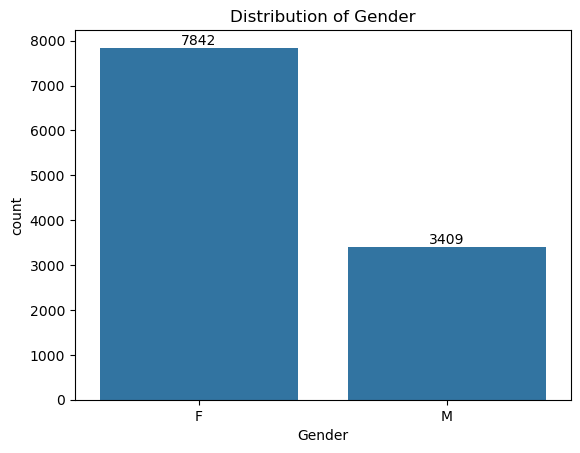

In [12]:
ax=sns.countplot(x='Gender',data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Distribution of Gender')
plt.show()

***Total Diwali Sales by Gender***

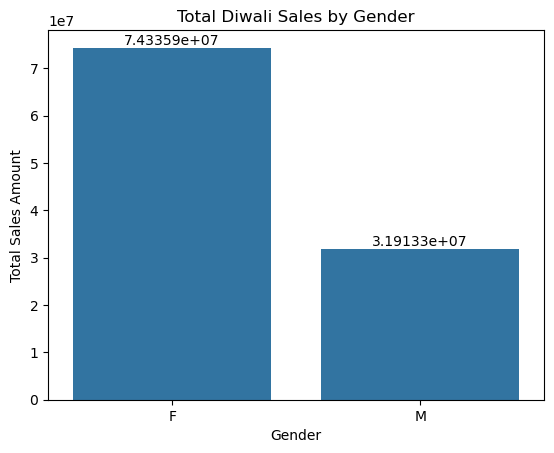

In [104]:


sales_amount = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

ax = sns.barplot(x='Gender', y='Amount', data=sales_amount) 

ax.bar_label(ax.containers[0])

plt.xlabel('Gender')
plt.ylabel('Total Sales Amount')
plt.title('Total Diwali Sales by Gender')
plt.show()

***From this we can see that most of the buyers are females and purchasing power of females is higher than males***

## Age Group-wise Trends

***Age Group Distribution of Customers***

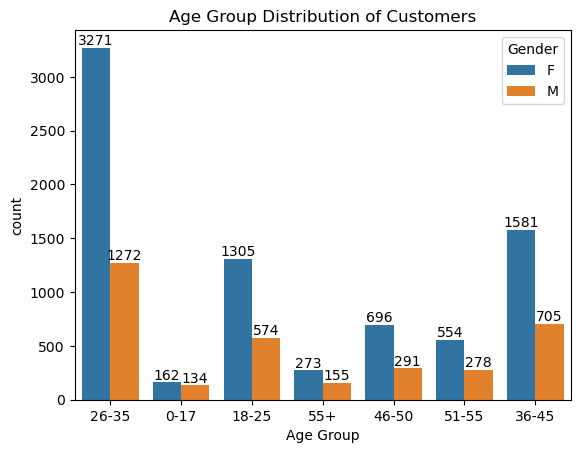

In [34]:
ax=sns.countplot(x='Age Group',hue='Gender',data=df)

for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Age Group Distribution of Customers')    
plt.show()

In [50]:
df.groupby('Age Group')['Amount'].sum().sort_values()

Age Group
0-17      2699653.00
55+       4080987.00
51-55     8261477.00
46-50     9207844.00
18-25    17240732.00
36-45    22144995.49
26-35    42613443.94
Name: Amount, dtype: float64

***Spending patterns by age group***

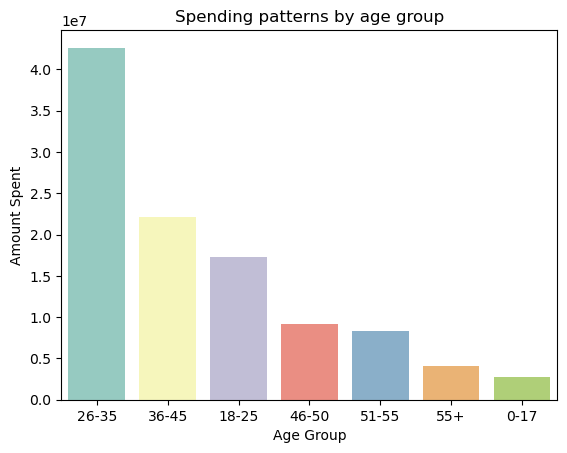

In [101]:
sales_age=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Age Group', y='Amount', data=sales_age,hue='Age Group',palette='Set3')
plt.title('Spending patterns by age group')
plt.ylabel('Amount Spent')
plt.show()


***From this we can see that most of the buyers are females belonging to  age group between 26-35***

## State-wise Trends

***Top 10 States with the Highest Number of Orders***

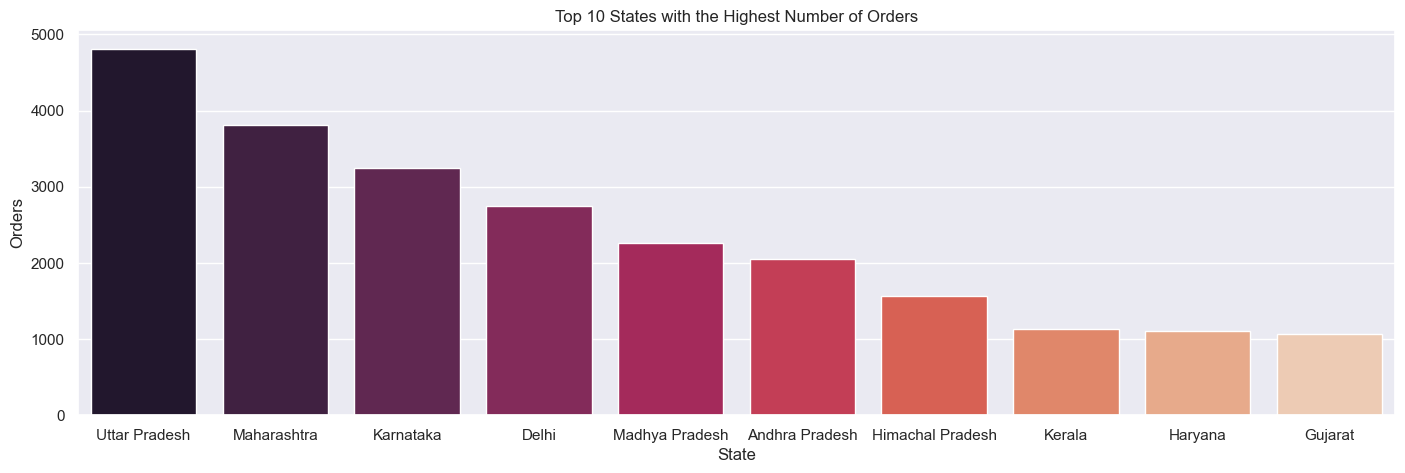

In [171]:
sales_state=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(17,5)})
sns.barplot(data=sales_state,x='State',y='Orders',hue='State',palette='rocket')
plt.title('Top 10 States with the Highest Number of Orders')
plt.show()

***Top 10 States by Spending Amount***

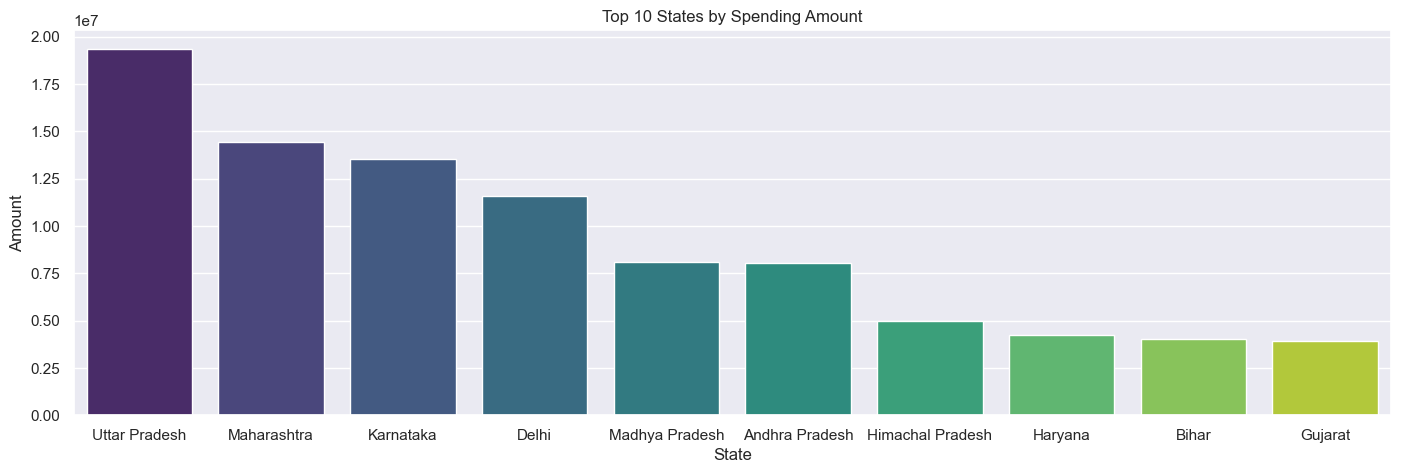

In [177]:
sales_state=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(17,5)})
sns.barplot(data=sales_state,x='State',y='Amount',hue='State',palette='viridis')
plt.title('Top 10 States by Spending Amount')
plt.show()

***The graphs show that UP, Maharashtra, and Karnataka have the highest order volume and spending***

## Marital Status Trend

***Marital Status Distribution Among Customers***

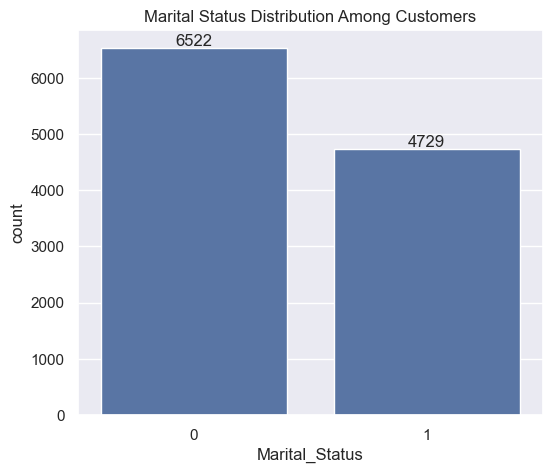

In [14]:
ax=sns.countplot(x='Marital_Status',data=df)

sns.set(rc={'figure.figsize':(6,4)})

for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Marital Status Distribution Among Customers')
plt.show()

***Customer Spending by Gender and Marital Status***

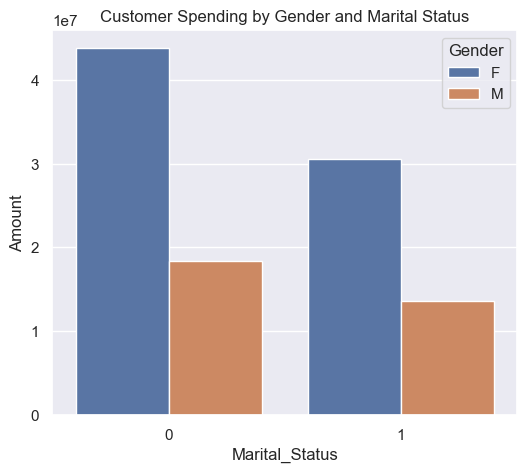

In [16]:
sales_mar=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data=sales_mar,x='Marital_Status',y='Amount',hue='Gender')
plt.title('Customer Spending by Gender and Marital Status')
plt.show()

## Customer Occupational Trends

***Customer Count by Occupation***

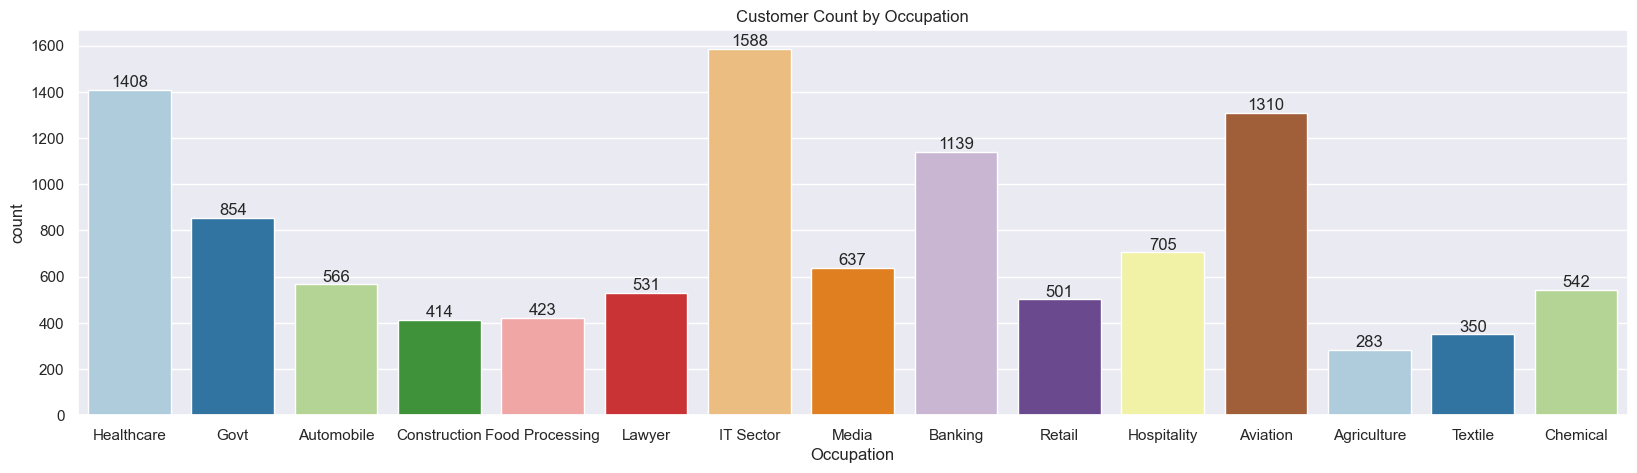

In [45]:
ax=sns.countplot(data=df,x='Occupation',hue='Occupation',palette='Paired')
for bars in ax.containers:
    ax.bar_label(bars)

sns.set(rc={'figure.figsize':(20,5)})
plt.title('Customer Count by Occupation')
plt.show()    

***Spending Trends Across Different Occupations***

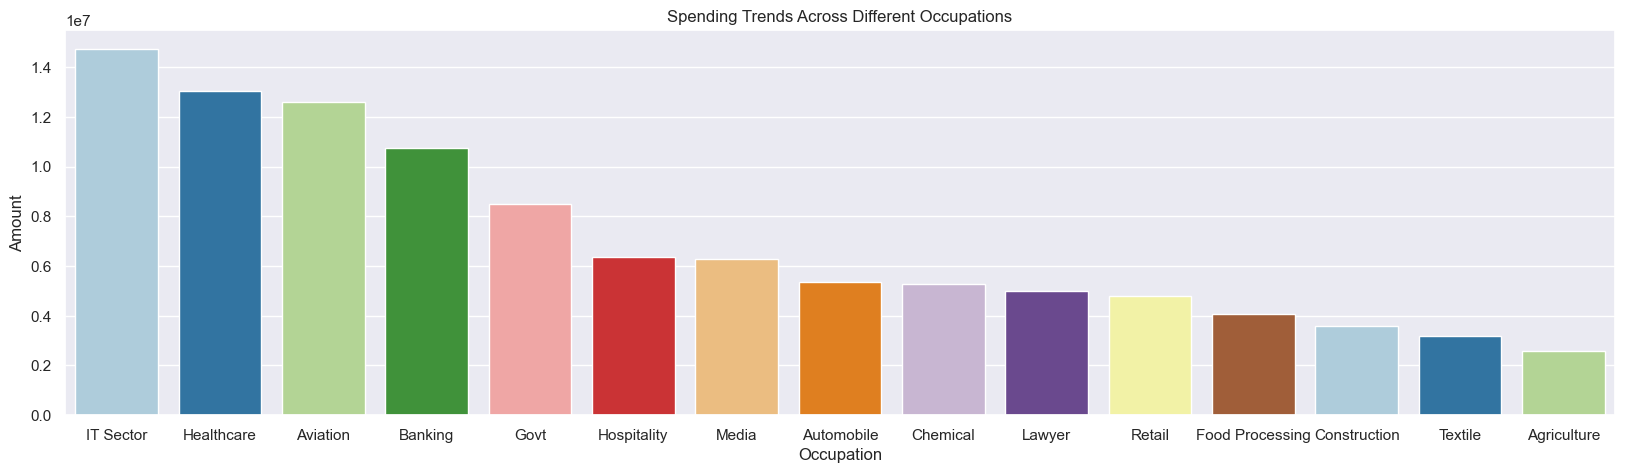

In [49]:
sales_ocu=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_ocu,x='Occupation',y='Amount',hue='Occupation',palette='Paired')

plt.title('Spending Trends Across Different Occupations')
plt.show()    

***From the above graphs we can see that most of the buyers are working in IT Sector, Healthcare, and Aviation sector***

## Product Category Trends

***Product Category Distribution***

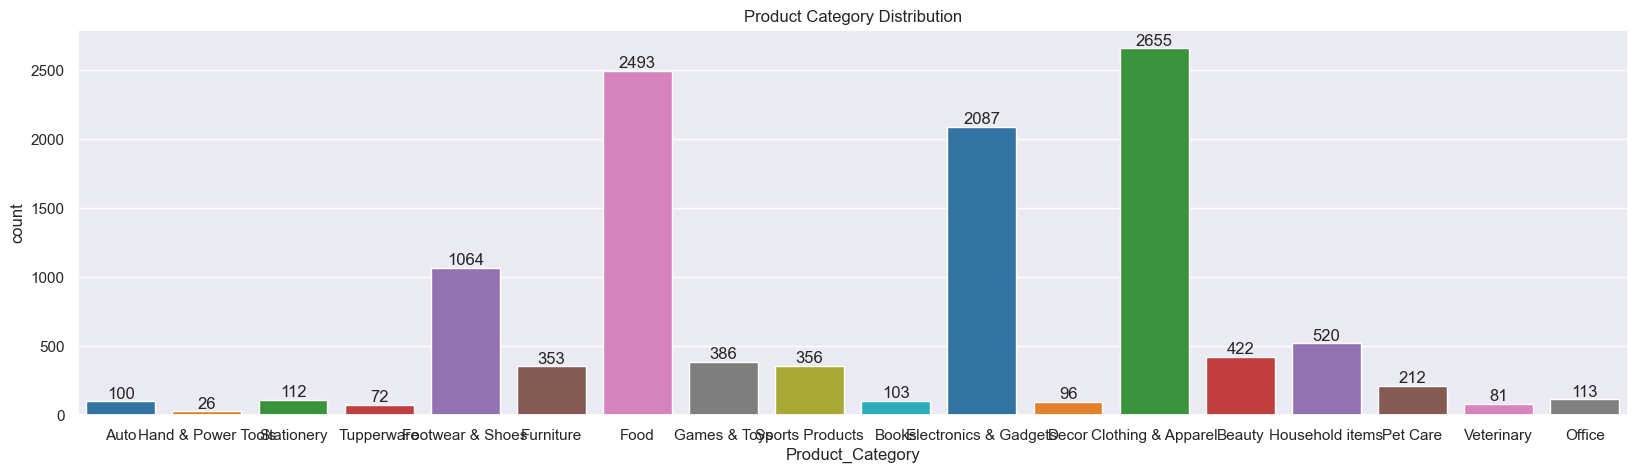

In [87]:
ax=sns.countplot(data=df,x='Product_Category',hue='Product_Category',palette='tab10')
for bars in ax.containers:
    ax.bar_label(bars)

sns.set(rc={'figure.figsize':(20,5)})
plt.title('Product Category Distribution')
plt.show()

***Spending by Product Category***

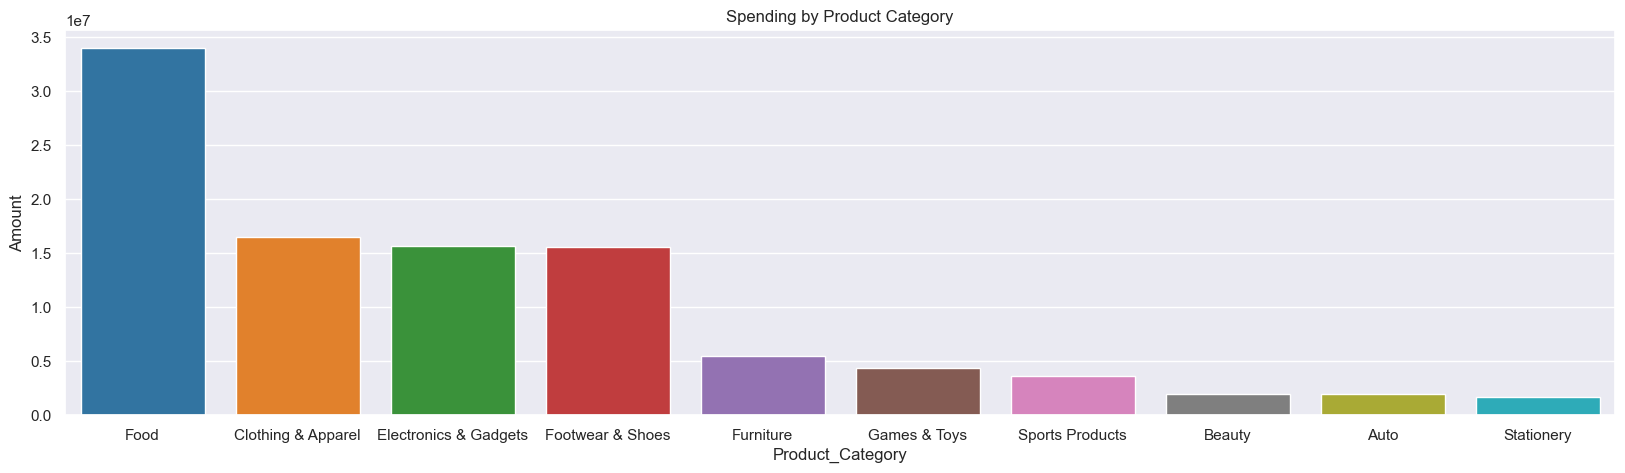

In [89]:
sales_ocu=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_ocu,x='Product_Category',y='Amount',hue='Product_Category',palette='tab10')

plt.title('Spending by Product Category')
plt.show()

***As shown in the graphs, the Food, Clothing , and Electronics categories represent the highest proportion of product sales***

## Top 10 Selling Products

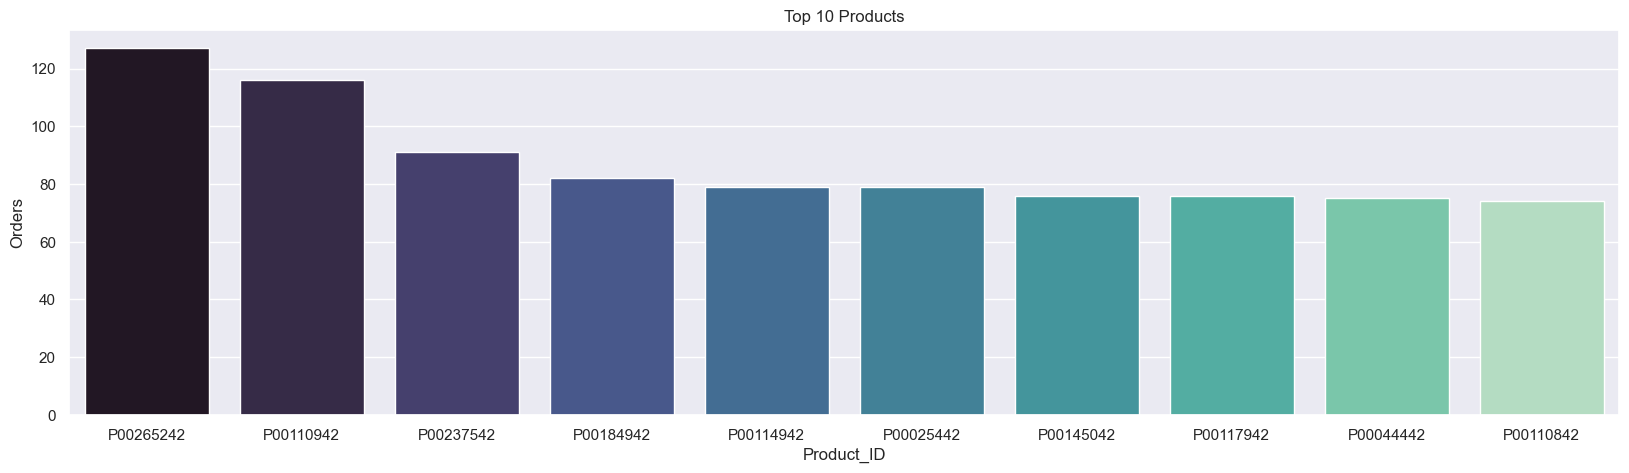

In [105]:
sales_ocu=df.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_ocu,x='Product_ID',y='Orders',hue='Product_ID',palette='mako')

plt.title('Top 10 Products')
plt.show()

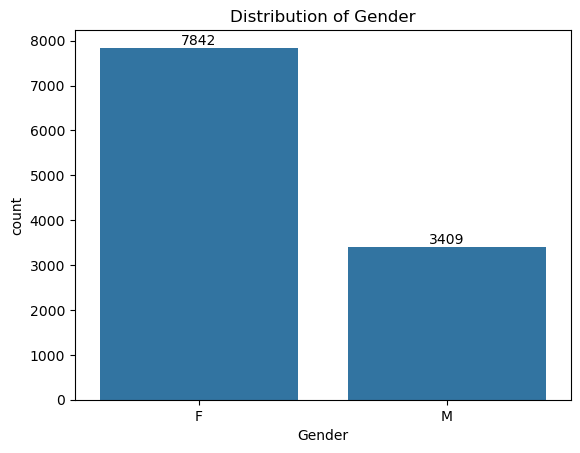

In [8]:
ax=sns.countplot(x='Gender',data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Distribution of Gender')
plt.show()